# Linear regression



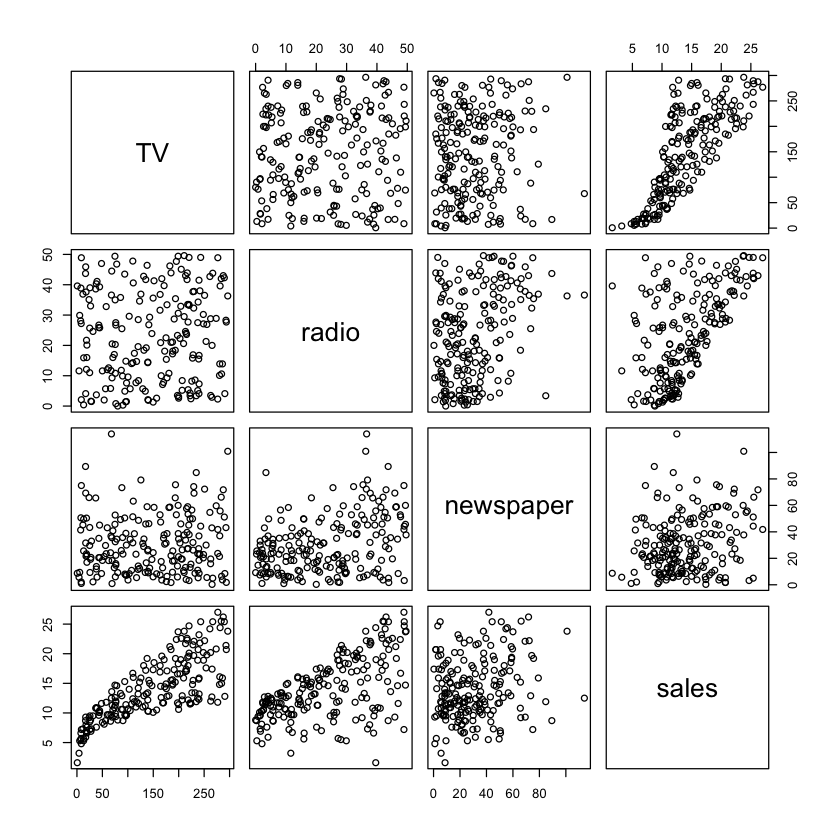

In [1]:
advertising_url = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"
a <- read.csv(advertising_url, row.names=1)
plot(a)

## Simple linear regression

$Y = \beta_0 + \beta_1 X$

$\beta_0$ - intersept, $\beta_1$ - slope

Typical approach to calculate coefissients is to minimize *least squared*. 

$\hat{y}_i = \hat{\beta_0} + \hat{\beta_1}x_i $ - prediction of ith result. Then $e_i = y_i - \hat{y_i}$ - *residual*.

$RSS = e_1^2 + e_2^2 + \dots + e_n^2$ - Residual sum of squares. Coefficients are chosen to minimize RSS. In other worlds, $RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1}x)^2 + \dots + (y_n - \hat{\beta_0} - \hat{\beta_1}x)^2$. 

SO, $\hat{\beta_1} = \frac{\sum\limits_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^n (x_i - \bar{x})^2}$ , 

$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$


True relationship is called *population regression line*. Least square approximation - *least squared line*.

Notion of *standart error*:

$Var(\hat{\mu}) = SE(\hat{\mu}^2) = \frac{\sigma^2}{n}$, where $\sigma$ is a standart deviation for each $y_i$. (How much estimate $\hat{\mu}$ differs from real $\mu$).


Standart error associated with coeficients: 

$SE(\hat{\beta_0})^2 = \sigma^2\lbrack \frac{1}{n} + \frac{\bar{x}^2}{\sum\limits_{i=1}^n(x_i - \bar{x})^2} \rbrack$, 

$SE(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum\limits_{i=1}^n(x_i - \bar{x})^2}$, where $\sigma^2 = Var(\epsilon)$. $\sigma$ is unknown but calculated from data. 

$\sigma = RSE = \sqrt{\frac{RSS}{n-2}}$ - residual standart error.

Standart errors are used to calculate *confidence intervals*.

For linear regression, the confidence interval (means there's 95% chance of it to have true value of $\beta_1$) turns out as following: 

$\lbrack \hat{\beta_1} - 2SE(\hat{\beta_1}),    \hat{\beta_1} + 2SE(\hat{\beta_1})\rbrack$


For $\hat\beta_0$, same : $\hat\beta_0 +- 2SE(\hat\beta_0)$

For checking null hypotesis typically we calculate *t-statistics* which determines the number of standart deviations that $\hat{\beta_1}$ is from 0.

$t = \frac{\hat{\beta_1} - 0}{SE(\hat{\beta_1})}$

*P-value* is a probability of observing any value equal to |t| or larger. The smaler p-value is, the less chance to have this observation by chance. 


### Accuracy of simple model

* RSE  - average amount that response will deviate from true regression line (measure of *lack of fit*)
* $R^2$ - statistics. Alternative measure of fit. Thakes the form of *proportion*. $R^2  = 1 - \frac{RSS}{TSS}$, where $TSS = \sum(y_i - \bar{y})^2$ - *total sum of squares*. TSS measures the total variance in response, RSS measures amount of variability that left unexplained after linear regression.
* F - statistics


## Multiple linear regression

$Y = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p + \epsilon$

Null hypotesys is checked with *F-statistics*:

$F = \frac{\frac{TSS-RSS}{p}}{\frac{RSS}{n-p-1}}$. If there's no relationship, F-statistic is close to 1.

If alternativce hypotesis is true, F-statistics should be greater than 1.

Approaches to reduce number of variables:
* Forward selection
* Backward selection
* Mixed selection





# Classification

Probability vs Likelihood: 

Probability: $P(event | model)$

Likelyhood: $P(model | event)$

